### 아이스크림을 많이 먹으면 걸리는 병 

`-` ref- 데이터 과학자의 사고법: 더 나은 선택을 위한 통계학적 통찰의 힘 

https://books.google.co.kr/books?id=qy4iEAAAQBAJ&pg=PT87&lpg=PT87&dq=%EC%95%84%EC%9D%B4%EC%8A%A4%ED%81%AC%EB%A6%BC%EC%9D%84+%EB%A7%8E%EC%9D%B4+%EB%A8%B9%EC%9C%BC%EB%A9%B4+%EA%B1%B8%EB%A6%AC%EB%8A%94+%EB%B3%91+%EC%86%8C%EC%95%84%EB%A7%88%EB%B9%84&source=bl&ots=V9B7ZG6oR-&sig=ACfU3U0UMd4ehuRXYxI69TT6lIlU-r91bA&hl=en&sa=X&ved=2ahUKEwj13JSV19LzAhVEGaYKHdgfDgcQ6AF6BAgCEAM#v=onepage&q=%EC%95%84%EC%9D%B4%EC%8A%A4%ED%81%AC%EB%A6%BC%EC%9D%84%20%EB%A7%8E%EC%9D%B4%20%EB%A8%B9%EC%9C%BC%EB%A9%B4%20%EA%B1%B8%EB%A6%AC%EB%8A%94%20%EB%B3%91%20%EC%86%8C%EC%95%84%EB%A7%88%EB%B9%84&f=false

`-` 내용요약 

- 여름 $\to$ 수영장 $\to$ 소아마비
- 여름 $\to$ 아이스크림 
- 아이스크림과 소아마비는 상관관계가 높다: 아이스크림 성분중에서 소아마비를 유발하는 유해물질이 있을 것이다 (?) 

`-` 아래와 같이 모형을 간단하게 하자. 

- 온도 $\to$ 소아마비 
- 온도 $\to$ 아이스크림 

### Toy exam 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

`-` 교재의 예제상황은 예를들면 아래와 같다. 

`-` 아이스크림 판매량 = 20 + 온도 $\times$ 2 + $\epsilon$

In [26]:
np.random.seed(1) 
temp= np.array([-10.2, -5.2, 0.1, 10.1, 12.2, 14.7, 
                25.4, 26.8, 28.9, 35.1, 32.2, 34.6])
ϵ1= np.random.normal(size=12,scale=5)
icecream= 20 + temp * 2 + ϵ1 

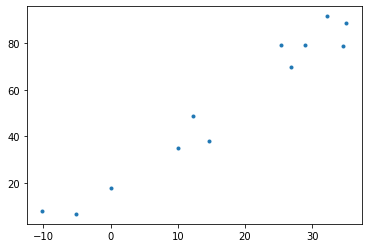

In [27]:
plt.plot(temp,icecream,'.')

- 온도와 아이스크림 판매량의 산점도 

`-` 소아마비 = 30 + 온도 $\times$ 0.5 + $\epsilon^*$

In [28]:
np.random.seed(2) 
ϵ2= np.random.normal(size=12,scale=5) 
disease = 30+ temp* 0.5 + ϵ2

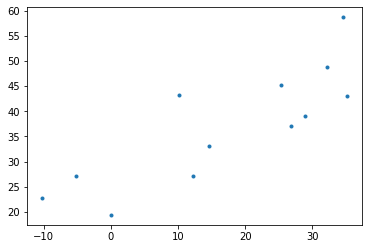

In [29]:
plt.plot(temp,disease,'.')

- 온도와 소아마비의 산점도 

`-` 아이스크림과 질병의 산점도를 그려보자. 

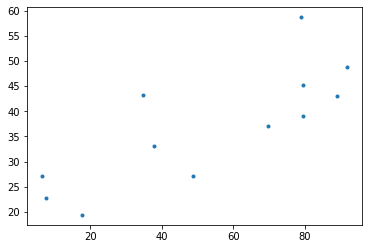

In [30]:
plt.plot(icecream,disease,'.')

- 양의 상관관계에 있다. 

`-` 아이스크림 중 어떠한 물질이 소아마비를 일으키는것이 분명하므로 (인과성이 분명해보이니까) 아래와 같은 모형을 세우자. <-- 여기서부터 틀렸음 

$${\tt disease}_i =\beta_0 +\beta_1 {\tt icecream}_i +\epsilon_i,\quad \textbf{for} ~~ i=1,2,\dots, 12$$

`-` 적절한 $\beta_0$와 $\beta_1$을 추정하면 우리는 아이스크림과 소아마비의 관계를 알 수 있다. <-- 틀린주장 
- 틀린 모형 
- 도데체 우리가 뭘 잘못했는가? 

`-` 두 변수 사이에 상관관계가 있어도 실제 원인은 다른 변수에 숨겨져 있는 경우가 많다. 

- 예제의상황: 아이스크림과 익사자도 양의 상관관계에 있을것이다. 
- 아이스크림을 먹이면 물에 빠져 죽는다 $\to$ 틀린주장 
- 사실 기온이 숨겨진 원인이다. 기온이 증가하면 아이스크림 판매량도 증가하고 폭염때문에 익사사고율도 높아지는 구조이다. 

`-` 아래와 같은 예제를 생각하자. 

- 인구수 $\to$ 교회 
- 인구수 $\to$ 범죄건수 
- 지역별 교회와 범죄건수를 살펴보면 상관관계가 높게 나올것임 


`-` 교회를 많이 지으면 범죄건수도 증가한다? 
- 사실 그렇지 않다. 
- 인구수가 비슷한 도시끼리 묶어서 비교해보면 교회와 범죄건수는 양의 상관관계에 있지 않을것임 

`-` 올바른 분석: 온도가 비슷한 그룹끼리 묶어서 그려보자. $\to$ 상관계수가 줄어들 것이다. 

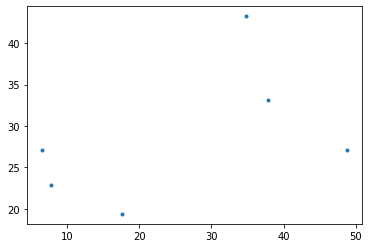

In [33]:
plt.plot(icecream[:6],disease[:6],'.')

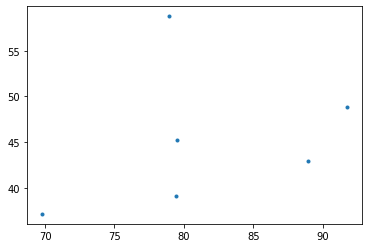

In [34]:
plt.plot(icecream[6:],disease[6:],'.')

`-` 진짜로 선형관계가 약해졌다.. 

### 좀 더 그럴듯한 자료 

`-` 위의 toy example은 데이터가 너무 작아서 억지스러움 

In [36]:
df=pd.read_csv('extremum.csv')

In [37]:
df

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각일교차,Unnamed: 8
0,146,전주,2020-01-01,-0.5,4.3,15:09,-6.4,1:42,10.7
1,146,전주,2020-01-02,1.4,6.5,14:12,-3.0,7:55,9.5
2,146,전주,2020-01-03,2.6,7.6,13:32,-0.5,23:53,8.1
3,146,전주,2020-01-04,2.0,7.7,13:51,-2.6,5:30,10.3
4,146,전주,2020-01-05,2.5,8.6,14:05,-3.2,7:36,11.8
...,...,...,...,...,...,...,...,...,...
651,146,전주,2021-10-13,19.9,25.5,14:29,15.6,3:49,9.9
652,146,전주,2021-10-14,20.4,25.5,13:36,17.0,6:15,8.5
653,146,전주,2021-10-15,18.3,22.0,13:47,15.7,4:48,6.3
654,146,전주,2021-10-16,12.8,17.4,0:01,6.5,23:31,10.9


`-` 평균기온만 선택하여 뽑자. 

In [38]:
pd.Series(df.columns)

0          지점번호
1           지점명
2            일시
3       평균기온(℃)
4       최고기온(℃)
5        최고기온시각
6       최저기온(℃)
7     최저기온시각일교차
8    Unnamed: 8
dtype: object

In [40]:
temp=np.array(df.iloc[:,3])

In [42]:
len(temp)

656

`-` 아이스크림 판매량 

In [43]:
np.random.seed(1)
ϵ1=np.random.normal(size=656, scale=10) 
icecream=temp*2 + 30 + ϵ1 

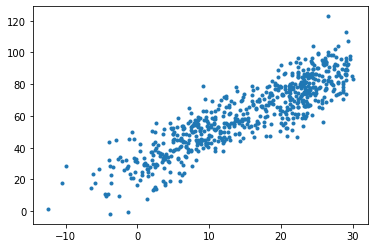

In [44]:
plt.plot(temp,icecream,'.')

`-` 소아마비

In [45]:
np.random.seed(2) 
ϵ2=np.random.normal(size=656,scale=1)
disease=temp*0.5 + 40 +ϵ2

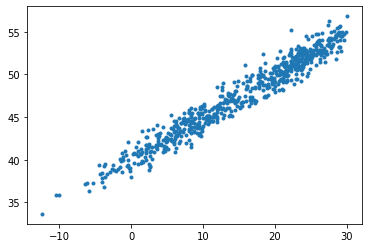

In [46]:
plt.plot(temp,disease,'.')

`-` 아이스크림과 소아마비

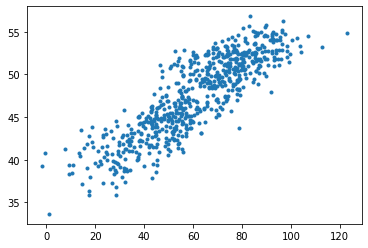

In [48]:
plt.plot(icecream,disease,'.')

In [49]:
np.corrcoef(icecream,disease)

array([[1.        , 0.86298975],
       [0.86298975, 1.        ]])

- 0.86정도.. 

`-` 여름만 뽑아서 그러보면? 

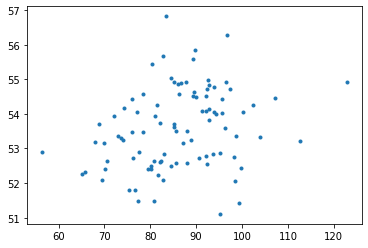

In [51]:
plt.plot(icecream[temp>25],disease[temp>25], '.') ## 평균기온이 25도가 넘어가면 여름

`-` 산점도 

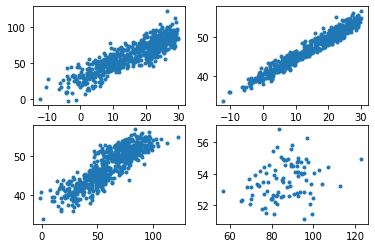

In [52]:
fig , ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2) 
ax1.plot(temp,icecream,'.')
ax2.plot(temp,disease,'.')
ax3.plot(icecream,disease,'.')
ax4.plot(icecream[temp>25],disease[temp>25],'.')

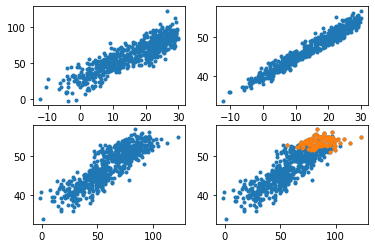

In [53]:
fig , ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2) 
ax1.plot(temp,icecream,'.')
ax2.plot(temp,disease,'.')
ax3.plot(icecream,disease,'.')
ax4.plot(icecream,disease,'.')
ax4.plot(icecream[temp>25],disease[temp>25],'.')

In [ ]:
I’m 